<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Sort-a-list-with-numpy" data-toc-modified-id="Sort-a-list-with-numpy-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Sort a list with numpy</a></span></li><li><span><a href="#Sorting-a-list-of-tuples-(id,-score)" data-toc-modified-id="Sorting-a-list-of-tuples-(id,-score)-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Sorting a list of tuples (id, score)</a></span></li><li><span><a href="#Sorting-top-K-elements-from-a-list-of-tuples-(id,-score)" data-toc-modified-id="Sorting-top-K-elements-from-a-list-of-tuples-(id,-score)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Sorting top K elements from a list of tuples (id, score)</a></span></li></ul></div>

In [162]:
%load_ext line_profiler

The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [164]:
import matplotlib.pyplot as plt
import memory_profiler
import pandas as pd
import numpy as np

## Sort a list with numpy

We want to sort so that the first element is the biggest


In [2]:
np.random.seed()
r = np.random.rand(10000)

In [3]:
def sort1(x: np.ndarray):
    return np.sort(x)[::-1] 

In [4]:
%%timeit 
sort1(r)

468 µs ± 4.74 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [5]:
def sort2(x: np.ndarray):
    aux = np.copy(x)
    aux[::-1].sort()
    return aux

In [6]:
%%timeit 
sort2(r)

476 µs ± 3.17 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [7]:
np.array_equal(sort1(r), sort2(r))

True

## Sorting a list of tuples (id, score)


Let us consider we want to code a function with the following input and output:

- INPUT: `r`, type `(List[Tuple[Any, Any]])`
    - List of Tuples with document id and score


- OUTPUT: `A`, type `(np.ndarray)`
    - Array of shape `[N x 2]`, where `N` in the length of the input list `r`.


In [8]:
x = np.array([(1,2),(3,4),(5,4),(23,90)],dtype=[('c1','<i4'),('c2','<i4')])
x['c1'],x['c2']

(array([ 1,  3,  5, 23], dtype=int32), array([ 2,  4,  4, 90], dtype=int32))

In [45]:
def get_data(n):
    ids = np.random.permutation(n)
    scores = np.random.rand(n)
    r = [(i,s) for i,s in zip(ids,scores)]
    return r

r = get_data(n = 10000)

In [46]:
def sort_by_score_1(r):
    r = np.array(r,dtype=[('ids',np.int),('scores',np.float64)])
    return np.sort(r, order='scores')[::-1]

In [47]:
%%timeit
sort_by_score_1(r)

4.5 ms ± 37.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [48]:
def sort_by_score_2(r: [(any,any)]):
    
    scores = np.array([r_k[1] for r_k in r])
    sorted_ids = scores.argsort()[::-1]
    r_sorted_np = np.array([r[i] for i in sorted_ids],
                           dtype=[('ids',np.int),('scores',np.float64)])
    return r_sorted_np

In [49]:
%%timeit
sort_by_score_2(r)

3.34 ms ± 36.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


We can verify that both functions return the same output

In [167]:
np.array_equal(sort_by_score_1(r), sort_by_score_2(r))

True

##### Benchmarking `sort_by_score_1` and `sort_by_score_2`

In [115]:
#%lprun -T profiling_results/sort_by_score_2.txt -D profiling_results/sort_by_score_2.lprof -f sort_by_score_2 sort_by_score_2(r)
%lprun -T profiling_results/sort_by_score_2.txt -f sort_by_score_2 sort_by_score_2(r)


*** Profile printout saved to text file 'profiling_results/sort_by_score_2.txt'. 


We can benchmark with different input lengths

In [148]:
n_values = np.array(np.linspace(1000,10000,10), dtype=int)

results_func1 = []
results_func2 = []

for n in n_values:
    r = get_data(n)
    
    r1 = %timeit -o sort_by_score_1(r)
    r2 = %timeit -o sort_by_score_2(r)
    
    results_func1.append(r1.average)
    results_func2.append(r2.average)
    

373 µs ± 1.93 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
306 µs ± 5.54 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
747 µs ± 1.79 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
743 µs ± 116 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.24 ms ± 39.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
982 µs ± 25.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.62 ms ± 8.5 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.3 ms ± 7.98 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.12 ms ± 41.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.62 ms ± 21.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
2.54 ms ± 31.8 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
1.94 ms ± 13.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
3.23 ms ± 91.2 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
2.31 ms ± 29.8 µs per loop (mean ± std. dev. of 7 runs, 100 lo

<AxesSubplot:xlabel='n_values'>

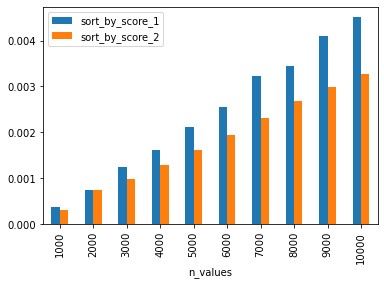

In [158]:
df_sort_by_score = pd.DataFrame({'sort_by_score_1':results_func1,
                                 'sort_by_score_2':results_func2,
                                 'n_values':n_values})

df = df_sort_by_score.set_index('n_values')
df.plot(kind='bar')

If the list is very big method 1 is also faster

In [168]:
r = get_data(n = 1_000_000)
r1 = %timeit -o sort_by_score_1(r)
r2 = %timeit -o sort_by_score_2(r)

653 ms ± 8.02 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
704 ms ± 6.07 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


## Sorting top K elements from a list of tuples (id, score)

Sometimes we do not need to sort all elements within a list, we simply care about the K highest values.

In [187]:
def sort_by_topk_1(r: [(any,any)], k=50):
    scores = np.array([r_k[1] for r_k in r])
    sorted_ids =  np.argpartition(scores,-k)[-k:]
    r_sorted_np = np.array([r[i] for i in reversed(sorted_ids)],
                           dtype=[('ids',np.int),('scores',np.float64)])
    return r_sorted_np


In [188]:
%%timeit
sort_by_topk_1(r,10)

113 ms ± 787 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [189]:
sort_by_topk_1(r,3)

array([( 89183, 0.99999731), (866239, 0.99999579), (551298, 0.99999394)],
      dtype=[('ids', '<i8'), ('scores', '<f8')])

In [190]:
sort_by_score_1(r)[0:3]

array([( 89183, 0.99999731), (866239, 0.99999579), (551298, 0.99999394)],
      dtype=[('ids', '<i8'), ('scores', '<f8')])